In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Anaylsis project for Blinkit data

## Import the raw data

In [201]:
df = pd.read_csv('blinkit_data.csv')

## Preview of the data

In [202]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


## Data info

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data cleaning

In [204]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [205]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [206]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

## Business requirments 

## KPI's requirments

In [207]:
## Total sales
Total_sales = df['Sales'].sum()
## Average sales
Avg_sales = df['Sales'].mean()
## No of items sold
no_items_sold = df['Sales'].count()
## Average ratings
Avg_ratings = df['Rating'].mean()

print(f"Total sales: ${Total_sales:,.0f}")
print(f"Average sales: ${Avg_sales:,.0f}")
print('No of items sold:', no_items_sold)
print(f"Average ratings: {Avg_ratings:,.1f}")

Total sales: $1,201,681
Average sales: $141
No of items sold: 8523
Average ratings: 4.0


## Impact of fat content on total sales, number of quantities sold per fat conent and average rating of each fat content item


/var/folders/t1/y36bsn410vl80qy4pvm0mh5m0000gn/T/ipykernel_3561/3431325309.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item Fat Content', y= 'Sales', data = sales_by_fat, palette = ['blue', 'orange'])


Text(0.5, 1.0, 'Pie chart for sales by fat content')

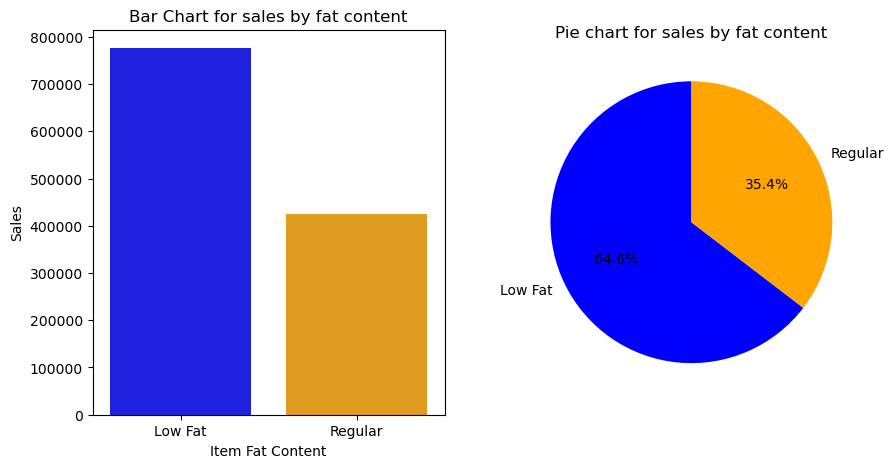

In [251]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum().reset_index()
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.barplot(x='Item Fat Content', y= 'Sales', data = sales_by_fat, palette = ['blue', 'orange'])
plt.title('Bar Chart for sales by fat content')
plt.subplot(1,2,2)
color = ['blue', 'orange']
plt.pie(sales_by_fat['Sales'],
    labels=sales_by_fat['Item Fat Content'],
    autopct='%.1f%%',
    startangle=90, colors = color)
plt.title('Pie chart for sales by fat content')

In [209]:
no_of_items_per_fat = df.groupby('Item Fat Content')['Sales'].count().reset_index()
no_of_items_per_fat

,Item Fat Content,Sales
0,Low Fat,5517
1,Regular,3006


In [210]:
Avg_ratings_per_fat = df.groupby('Item Fat Content')['Rating'].mean().round(0).astype(int).reset_index()
Avg_ratings_per_fat

,Item Fat Content,Rating
0,Low Fat,4
1,Regular,4


Text(0.5, 1.0, 'Average rating per fat content')

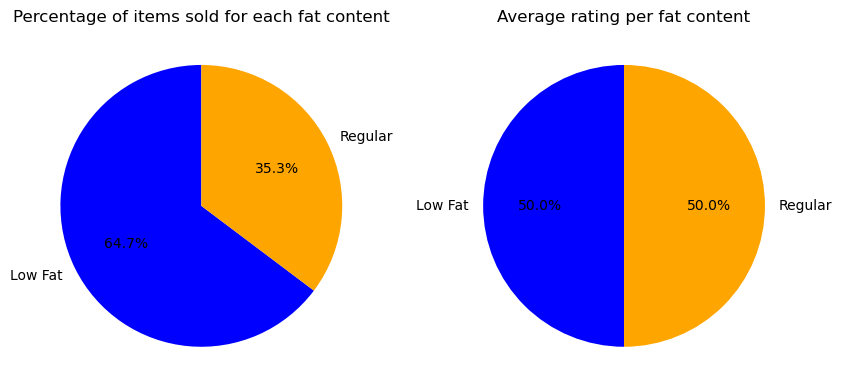

In [211]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
color = ['blue', 'orange']
plt.pie(no_of_items_per_fat['Sales'], labels = no_of_items_per_fat['Item Fat Content'], autopct='%.1f%%', startangle=90, colors = color)
plt.title('Percentage of items sold for each fat content')
plt.subplot(1,2,2)
color = ['blue', 'orange']
plt.pie(Avg_ratings_per_fat['Rating'], labels = Avg_ratings_per_fat['Item Fat Content'], autopct='%.1f%%', startangle=90, colors = color)
plt.title('Average rating per fat content')

## Total sales by item 

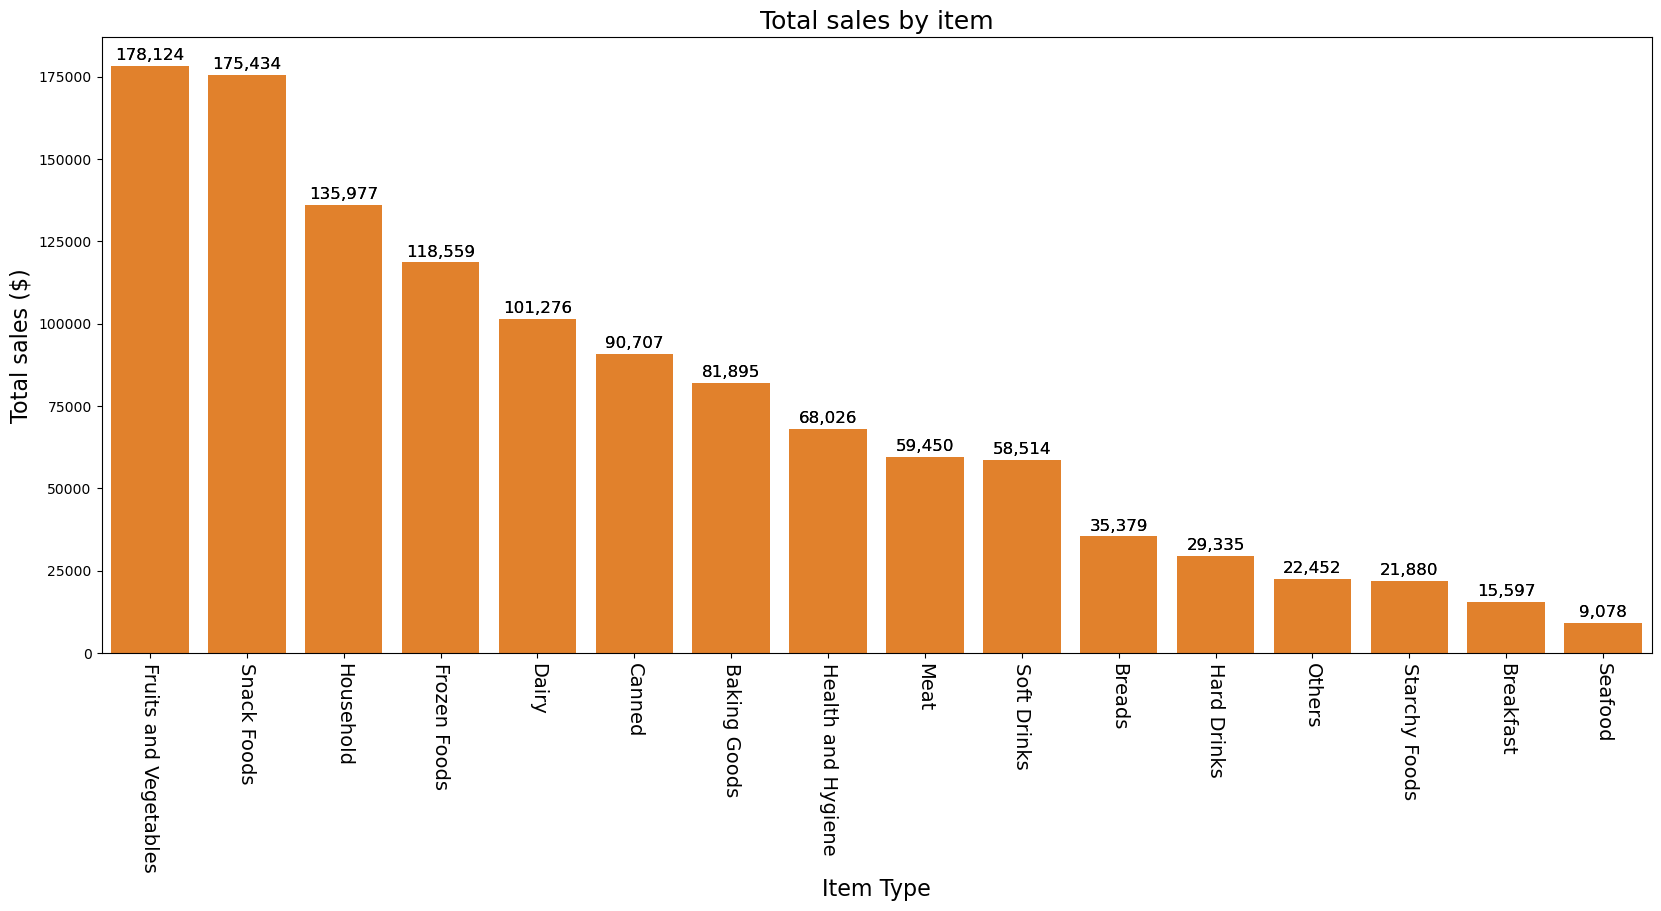

In [212]:
Total_sales_by_item = df.groupby('Item Type')['Sales'].sum().sort_values(ascending = False).round(0).astype(int).reset_index()
Total_sales_by_item
plt.figure(figsize = (20,8))
sns.barplot(x= 'Item Type', y='Sales', data = Total_sales_by_item)
plt.xticks(rotation = -90, fontsize = 14)
plt.xlabel('Item Type', fontsize = 16)
plt.ylabel('Total sales ($)', fontsize = 16)
plt.title('Total sales by item', fontsize = 18)
ax = sns.barplot(x='Item Type', y='Sales', data=Total_sales_by_item)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + 1000,  
            f'{int(height):,}', ha='center', va='bottom', fontsize=12, color='black')

    plt.show


Average rating of each item


In [213]:
Avg_rating_per_item = df.groupby('Item Type')['Rating'].mean().sort_values(ascending = False).round(3).reset_index()
Avg_rating_per_item


,Item Type,Rating
0,Meat,4.023
1,Household,3.999
2,Canned,3.994
3,Health and Hygiene,3.986
4,Baking Goods,3.983
5,Frozen Foods,3.971
6,Dairy,3.966
7,Seafood,3.959
8,Fruits and Vegetables,3.956
9,Others,3.954


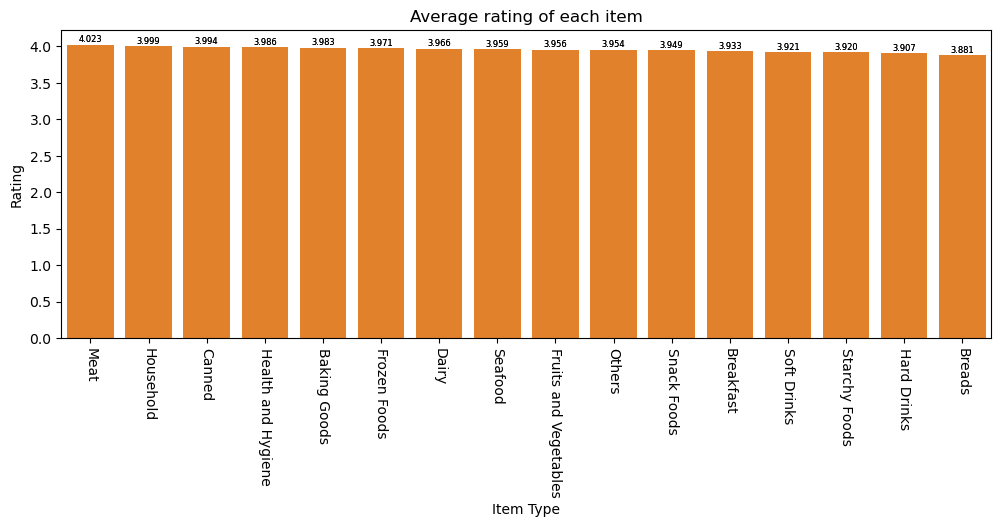

In [214]:
plt.figure(figsize = (12,4))
sns.barplot(x= 'Item Type', y='Rating', data = Avg_rating_per_item)
plt.xticks(rotation = -90)
plt.xlabel('Item Type')
plt.ylabel('Rating')
plt.title('Average rating of each item')
ax = sns.barplot(x= 'Item Type', y='Rating', data = Avg_rating_per_item)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height + 0.01, f'{height:.3f}', ha = 'center', va = 'bottom',fontsize=6, color='black')



## Fat content by outlet for total sales 


In [215]:
fat_by_outlet_for_sales = df.groupby(['Item Fat Content', 'Outlet Location Type'])['Sales'].sum().round(0).astype(int).reset_index()
fat_by_outlet_for_sales

,Item Fat Content,Outlet Location Type,Sales
0,Low Fat,Tier 1,215048
1,Low Fat,Tier 2,254465
2,Low Fat,Tier 3,306807
3,Regular,Tier 1,121350
4,Regular,Tier 2,138686
5,Regular,Tier 3,165326


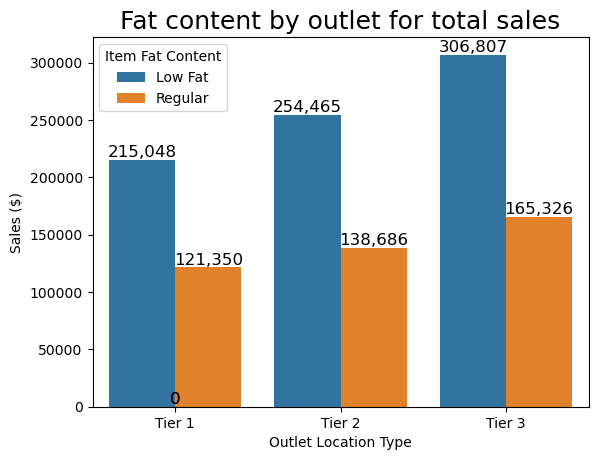

In [216]:
ax = sns.barplot(x= 'Outlet Location Type', y ='Sales', hue = 'Item Fat Content', data = fat_by_outlet_for_sales)
plt.title('Fat content by outlet for total sales', fontsize = 18)
plt.ylabel('Sales ($)')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2,
            height +10,  
            f'{int(height):,}', ha='center', va='bottom', fontsize=12, color='black')
    plt.show


## Total sales by outlet establishments

In [217]:
Total_sales_by_est_year = df.groupby('Outlet Establishment Year')['Sales'].sum().astype(int).reset_index()

Total_sales_by_est_year

,Outlet Establishment Year,Sales
0,1998,204522
1,2000,131809
2,2010,132113
3,2011,78131
4,2012,130476
5,2015,130942
6,2017,133103
7,2020,129103
8,2022,131477


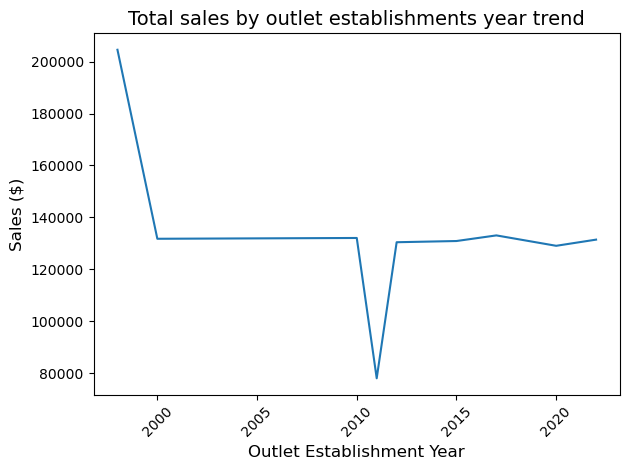

In [218]:
sns.lineplot(x = 'Outlet Establishment Year', y ='Sales', data = Total_sales_by_est_year)
plt.xlabel('Outlet Establishment Year', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.title('Total sales by outlet establishments year trend', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Sales by outlet size

In [234]:
Total_sales_by_outlet_size = df.groupby('Outlet Size').agg({'Sales':['sum', 'mean']}).astype(int).reset_index()
Total_sales_by_outlet_size.columns = ['Outlet Size','Total sales','Average sales']
Total_sales_by_outlet_size

,Outlet Size,Total sales,Average sales
0,High,248991,142
1,Medium,507895,139
2,Small,444794,141


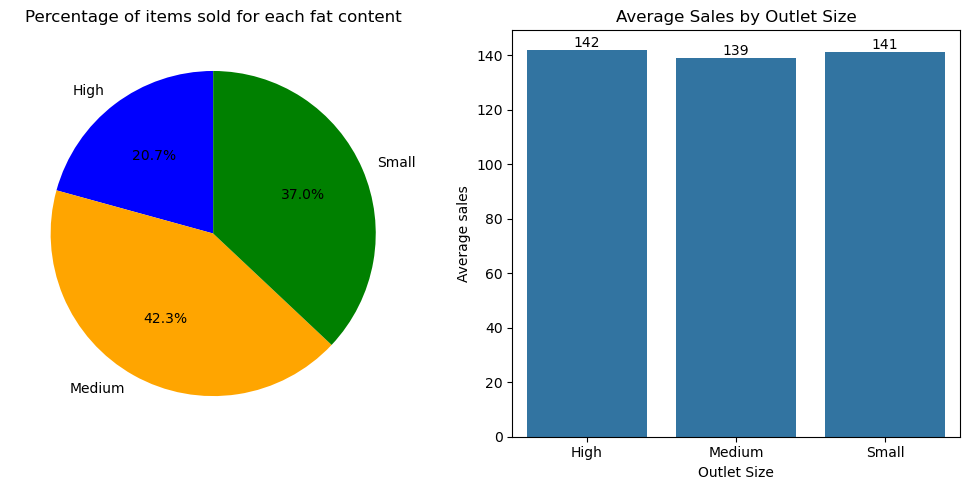

In [250]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
color = ['blue', 'orange', 'green']
plt.pie(Total_sales_by_outlet_size['Total sales'], labels = Total_sales_by_outlet_size['Outlet Size'], autopct='%.1f%%', startangle=90, colors = color)
plt.title('Percentage of items sold for each fat content')
plt.subplot(1,2,2)
ax = sns.barplot(x='Outlet Size', y = 'Average sales', data = Total_sales_by_outlet_size,)
plt.ylabel('Average sales')
plt.xlabel('Outlet Size')
plt.title('Average Sales by Outlet Size')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height:,.0f}',
        ha='center',
        va='bottom',
        fontsize=10
    )
plt.tight_layout()
plt.show()

## Sales by outlet location

In [255]:
Total_sales_by_outlet_loc = df.groupby('Outlet Location Type')['Sales'].sum().astype(int).reset_index()

Total_sales_by_outlet_loc

,Outlet Location Type,Sales
0,Tier 1,336397
1,Tier 2,393150
2,Tier 3,472133


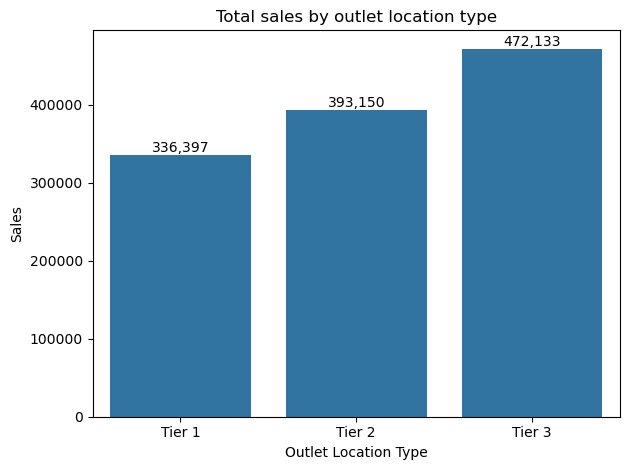

In [258]:
ax = sns.barplot(x= 'Outlet Location Type', y='Sales', data = Total_sales_by_outlet_loc) 
plt.title('Total sales by outlet location type')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height:,.0f}',
        ha='center',
        va='bottom',
        fontsize=10
    )
plt.tight_layout()
plt.show()